In [2]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
parent = os.path.join(Path(os.getcwd()).parent)

sys.path.append(parent)

from utils.results import SimulationResults

In [4]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [5]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

This notebook looks at the performance of the thermal model over a long period of time, to see how long it takes to get rid of initial conditions for different soil layers.

First load in model results.

In [6]:
# load in the modelling results
# results_folder = Path(r"P:\11210070-usgscoop-202324-arcticxb\runs\val_gt1")

runid1 = 'val_gt15'
runid2 = 'val_gt16'

fname_gt1 = "data/" + runid1 + "_ground_temperature_timeseries.csv"
fname_gt1 = "data/" + runid2 + "_ground_temperature_timeseries.csv"

# df_model = pd.read_csv(os.path.join(results_folder, fname), parse_dates=['time'])
df_gt1 = pd.read_csv(fname_gt1, parse_dates=['time'])
df_gt2 = pd.read_csv(fname_gt1, parse_dates=['time'])

# Lets add some columns to convert to Celcius
colnames = ['temp_0.0m[K]', 'temp_0.5m[K]', 'temp_1.0m[K]', 'temp_2.0m[K]', 'temp_2.95m[K]']

for colname in colnames:
    
    df_gt1[f'{colname[:-3]}[C]'] = df_gt1[colname] - 273.15
    df_gt2[f'{colname[:-3]}[C]'] = df_gt2[colname] - 273.15

df_gt1.head()

,Unnamed: 0,time,air_temp[K],temp_0.0m[K],temp_0.25m[K],temp_0.5m[K],temp_0.75m[K],temp_1.0m[K],temp_1.25m[K],temp_1.5m[K],...,total_heat_flux[W/m2],long_wave_radiation_flux[W/m2],solar_radiation_flux[W/m2],latent_heat_flux[W/m2],convective_heat_flux[W/m2],temp_0.0m[C],temp_0.5m[C],temp_1.0m[C],temp_2.0m[C],temp_2.95m[C]
0,0,2011-01-01 00:00:00,247.379488,266.044545,266.044545,266.045859,266.124737,266.225858,265.788907,265.133481,...,0.000000,0.000000,0.0,0.000000,0.000000,-7.105455,-7.104141,-6.924142,-9.093462,-10.017834
1,1,2011-01-01 01:00:00,247.379488,256.136192,266.001832,266.052684,266.124721,266.171753,265.788283,265.133481,...,-930.246006,-13.164846,0.0,-7.025107,-910.056053,-17.013808,-7.097316,-6.978247,-9.070673,-10.001005
2,2,2011-01-01 02:00:00,247.560030,252.305490,265.803601,266.057426,266.124473,266.135625,265.785421,265.133481,...,-504.906632,-12.339870,0.0,-6.964844,-485.601918,-20.844510,-7.092574,-7.014375,-9.055150,-9.988804
3,3,2011-01-01 03:00:00,247.865404,250.908337,265.457802,266.060299,266.123689,266.108384,265.780403,265.133477,...,-316.478234,-8.263931,0.0,-6.950936,-301.263367,-22.241663,-7.089701,-7.041616,-9.043274,-9.979081
4,4,2011-01-01 04:00:00,248.032535,250.366999,265.018171,266.060390,266.122204,266.086069,265.773875,265.133452,...,-237.261483,-9.039967,0.0,-6.844316,-221.377200,-22.783001,-7.089610,-7.063931,-9.033450,-9.970837


In [7]:
print(df_gt1.time)

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
87595   2011-12-31 19:00:00
87596   2011-12-31 20:00:00
87597   2011-12-31 21:00:00
87598   2011-12-31 22:00:00
87599   2011-12-31 23:00:00
Name: time, Length: 87600, dtype: datetime64[ns]


Load in data.

In [8]:
# load in Erikson data
df_erikson = pd.read_csv(
    os.path.join(parent, Path(r"database\raw_datasets\erikson\Groundtemperatu\BTI_2011TimeSeriesData_GroundTemperature.csv")),
    )

# parse dates
df_erikson['time'] = pd.to_datetime(df_erikson[["year", "month", "day", "hour", "minute"]])

# only keep data from site BL01, BL02, BL03, BL04 (these are the ones on the center bottom dataset)
site_ids = ['BL01', 'BL02', 'BL03', 'BL04']
df_erikson = df_erikson[df_erikson['SiteID'].isin(site_ids)]

# lets have a look
display(df_erikson.head())
display(df_erikson.tail())

,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,time
0,BL01,HOBO,-143.77901,70.08405,2011,7,8,7,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 07:00:00
1,BL01,HOBO,-143.77901,70.08405,2011,7,8,8,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 08:00:00
2,BL01,HOBO,-143.77901,70.08405,2011,7,8,9,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 09:00:00
3,BL01,HOBO,-143.77901,70.08405,2011,7,8,10,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 10:00:00
4,BL01,HOBO,-143.77901,70.08405,2011,7,8,11,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 11:00:00


,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,time
7878,BL04,HOBO,-143.77947,70.084211,2011,9,28,15,0,-0.5,NaN,NaN,-0.5,NaN,-0.5,-0.5,NaN,NaN,NaN,2011-09-28 15:00:00
7879,BL04,HOBO,-143.77947,70.084211,2011,9,28,16,0,-0.5,NaN,NaN,-0.4,NaN,-0.5,-0.5,NaN,NaN,NaN,2011-09-28 16:00:00
7880,BL04,HOBO,-143.77947,70.084211,2011,9,28,17,0,-0.4,NaN,NaN,-0.3,NaN,-0.4,-0.4,NaN,NaN,NaN,2011-09-28 17:00:00
7881,BL04,HOBO,-143.77947,70.084211,2011,9,28,18,0,-0.2,NaN,NaN,-0.1,NaN,-0.1,-0.2,NaN,NaN,NaN,2011-09-28 18:00:00
7882,BL04,HOBO,-143.77947,70.084211,2011,9,28,19,0,0.9,NaN,NaN,1.5,NaN,1.5,1.2,NaN,NaN,NaN,2011-09-28 19:00:00


Choose study site.

In [9]:
# Let's for now stick with only BL01
df_erikson = df_erikson[df_erikson['SiteID'].isin(['BL01'])]

df_erikson.head()
print(df_erikson.columns)

Index(['SiteID', 'Instrument', 'Longitude', 'Latitude', 'year', 'month', 'day',
       'hour', 'minute', 'Tair', 'T10cm', 'T15cm', 'T30cm', 'T50cm', 'T60cm',
       'T90cm', 'T100cm', 'T200cm', 'T295cm', 'time'],
      dtype='object')


In [40]:
erikson_columns = ["T50cm", "T100cm", "T200cm", "T295cm"]

print(9 % 2)

1


Let's plot all model results in one large plot.

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_6788\3970274014.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


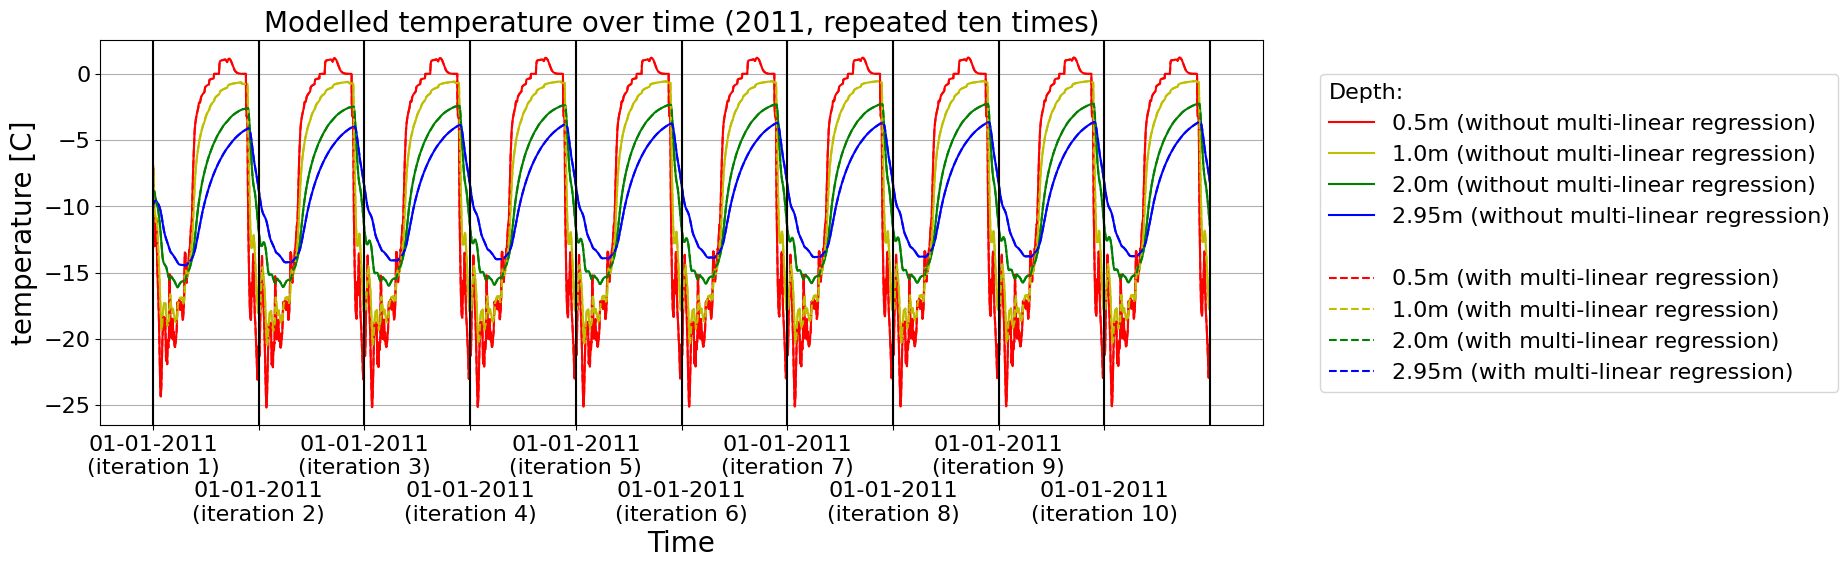

In [43]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df_gt1.index, df_gt1['temp_0.5m[C]'].values, color='r', label=f'0.5m (without multi-linear regression)')
ax.plot(df_gt1.index, df_gt1['temp_1.0m[C]'].values, color='y', label=f'1.0m (without multi-linear regression)')
ax.plot(df_gt1.index, df_gt1['temp_2.0m[C]'].values, color='g', label=f'2.0m (without multi-linear regression)')
ax.plot(df_gt1.index, df_gt1['temp_2.95m[C]'].values, color='b', label=f'2.95m (without multi-linear regression)')

ax.plot([], [], label=' ', alpha=0)

ax.plot(df_gt2.index, df_gt2['temp_0.5m[C]'].values, '--', color='r', label=f'0.5m (with multi-linear regression)')
ax.plot(df_gt2.index, df_gt2['temp_1.0m[C]'].values, '--', color='y', label=f'1.0m (with multi-linear regression)')
ax.plot(df_gt2.index, df_gt2['temp_2.0m[C]'].values, '--', color='g', label=f'2.0m (with multi-linear regression)')
ax.plot(df_gt2.index, df_gt2['temp_2.95m[C]'].values, '--', color='b', label=f'2.95m (with multi-linear regression)')

ax.grid()
ax.legend(bbox_to_anchor=(1.04, 0.5), title='Depth:', loc='center left', markerscale=5, alignment='left')

ax.set_title("Modelled temperature over time (2011, repeated ten times)")
ax.set_ylabel('temperature [C]')

vline_positions = np.arange(0, 87600+8760, 8760)
for pos in vline_positions:
    ax.axvline(pos, color='k')

xlabels = ['\n' * 2 * (i % 2) + f'01-01-2011\n(iteration {i+1})' for i in range(len(vline_positions))]

ax.set_xticks(vline_positions[:-1], xlabels[:-1])

ax.set_xlabel('Time')

# ax.set_ylim((-10, 0))

fig.show()

fig.savefig(os.path.join(save_path, 'spin_up.png'), bbox_inches='tight', facecolor='white', transparent=False)

Let's define a function that converts datetime to hour of year, and adds a number corresponding to the number of the iteration.

In [12]:
def time_to_index(date_array, iteration=0):
    
    # print(pd.to_datetime(df_erikson.time).dt.dayofyear.shape)
    # print(pd.to_datetime(df_erikson.time).dt.hour.shape)
    
    return (pd.to_datetime(df_erikson.time).dt.dayofyear * 24 + pd.to_datetime(df_erikson.time).dt.hour).values + iteration * 8760
    
(time_to_index(df_erikson, 9)).shape

(1940,)

And now each one individually, each year layered over eachother

In [13]:
df_gt = [df_gt1, df_gt2][0]

In [14]:
N = len(df_gt1)
years = np.arange(10)

N_year = int(N / len(years))

model_temp_050 = df_gt['temp_0.5m[C]'].values.reshape((len(years), N_year))
model_temp_100 = df_gt['temp_1.0m[C]'].values.reshape((len(years), N_year))
model_temp_200 = df_gt['temp_2.0m[C]'].values.reshape((len(years), N_year))
model_temp_295 = df_gt['temp_2.95m[C]'].values.reshape((len(years), N_year))

print(model_temp_050.shape)

(10, 8760)


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_6788\1818593750.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


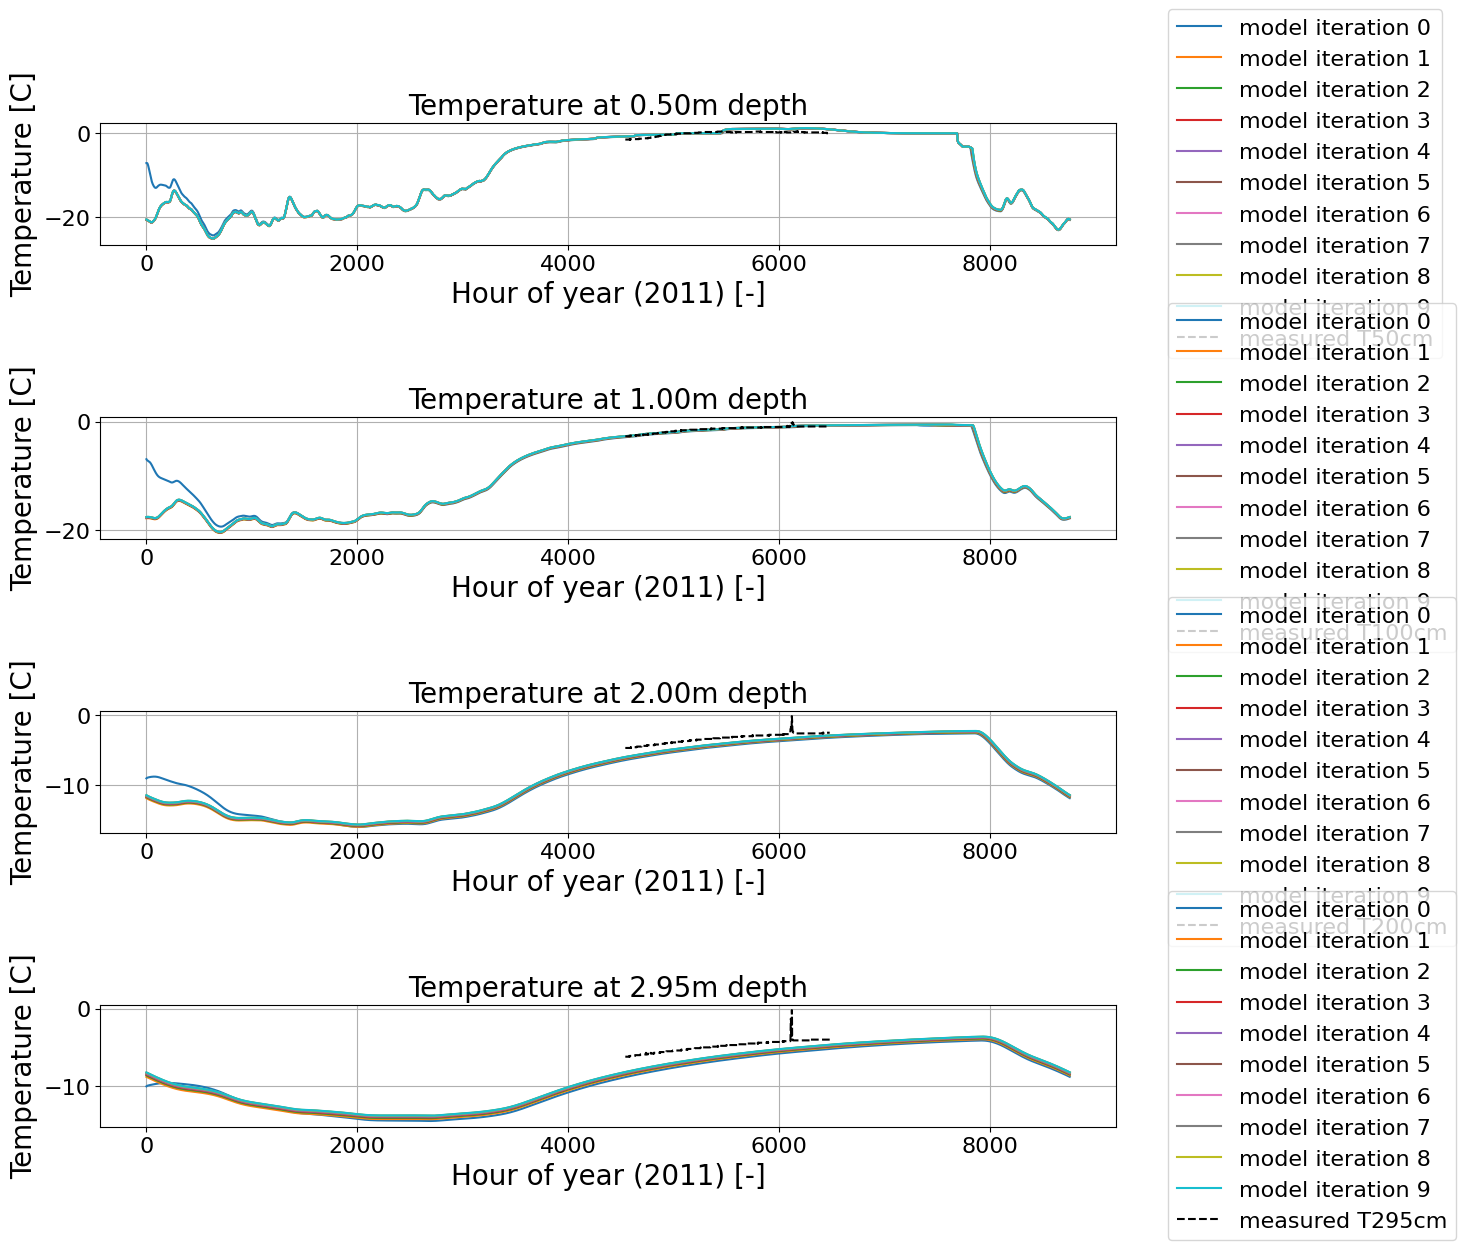

In [15]:
fig, axs = plt.subplots(4, 1, figsize=(15, 12))

# loop through different depths
for i, model_temp in enumerate([model_temp_050, model_temp_100, model_temp_200, model_temp_295]):
    
    # loop through different years
    for it, row in enumerate(model_temp):
        
        axs[i].plot(np.arange(N_year), model_temp[it,:], label=f'model iteration {it}')
        # axs[i].plot(np.arange(N_year), model_temp[it,:], label=f'model iteration {it}', alpha=0.5)

    # also plot measured data
    col = erikson_columns[i]
    axs[i].plot(time_to_index(df_erikson.time), df_erikson[col], "k--", label=f"measured {col}")
    
    # and give the plot some attributes
    axs[i].grid()
    axs[i].legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
    axs[i].set_xlabel('Hour of year (2011) [-]')
    axs[i].set_ylabel('Temperature [C]')
    axs[i].set_title(f'Temperature at {[0.5, 1.0, 2.0, 2.95][i]:.2f}m depth')
    
        
fig.tight_layout()
fig.show()

Text(0.5, 1.0, 'Surface temperature over time (2011 ten times repeated)')

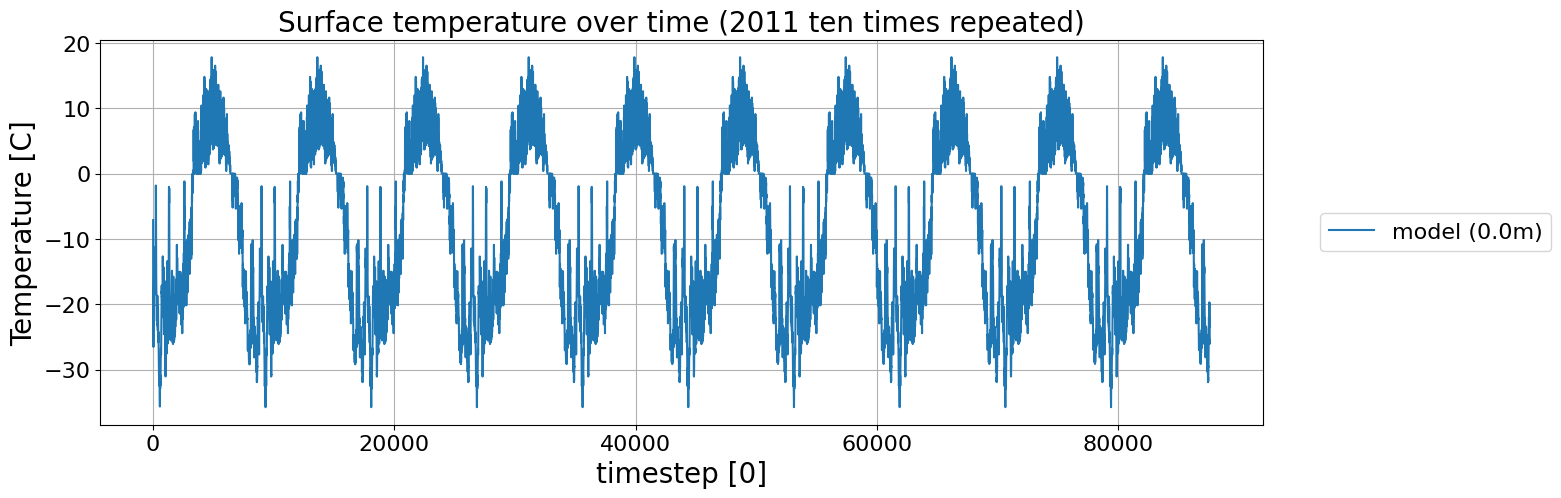

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df_gt.index, df_gt['temp_0.0m[C]'], label="model (0.0m)")

ax.grid()
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
ax.set_xlabel('timestep [0]')
ax.set_ylabel('Temperature [C]')
ax.set_title("Surface temperature over time (2011 ten times repeated)")

